**PROJECT: DỰ ĐOÁN NGUY CƠ MẮC CÁC VẤN ĐỀ LIÊN QUAN ĐẾN SỨC KHỎE TINH THẦN**

**Chú thích dữ liệu**

| Cột | Mô tả |
|:----|:------|
| **age** | Độ tuổi |
| **gender** | Giới tính ( Male - nam,  Female - nữ) |
| **employment_status** | Tình trạng việc làm |
| **work_environment** | Môi trường làm việc |                  
| **mental_health_history** | Có lịch sử mắc vấn đề về sức khỏe tinh thần |          
| **seeks_treatment** | Có tìm đến điều trị hay không |
| **stress_level** | Mức độ căng thẳng (từ 1 đến 10) |
| **sleep_hour** | Số giờ ngủ mỗi ngày |
| **physical_activity_days** | Số ngày vận động mỗi tuần |
| **depression_score** | Điểm đo lường triệu chứng trầm cảm |                  
| **anxiety_score** | Điểm đo lường độ mức lo âu |  
| **social_support_score** | Điểm đánh giá mức độ hỗ trợ xã hội(gia đình, bạn bè,...) |  
| **productivity_score** | Đánh giá năng suất làm việc |  
| **mental_health_risk** | Nguy cơ sức khỏe tinh thần|  

# **1. IMPORT MODULE**

In [4]:
import sys
sys.path.append('../../')

from project import *

# **2. TIỀN XỬ LÝ DỮ LIỆU**

## **2.1. LOAD DATA**

In [5]:
# Nạp dữ liệu
d = DataPreprocessor.load('mental_health_dataset.csv')

# In ra thông tin về dữ liệu
d.summary()


Kích thước dữ liệu: (10000, 14)

Mô tả dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     9992 non-null   object 
 1   gender                  9998 non-null   object 
 2   employment_status       9994 non-null   object 
 3   work_environment        9999 non-null   object 
 4   mental_health_history   9988 non-null   object 
 5   seeks_treatment         9990 non-null   object 
 6   stress_level            9997 non-null   float64
 7   sleep_hours             9992 non-null   float64
 8   physical_activity_days  9990 non-null   float64
 9   depression_score        9998 non-null   float64
 10  anxiety_score           9993 non-null   float64
 11  social_support_score    9997 non-null   float64
 12  productivity_score      9995 non-null   float64
 13  mental_health_risk      9999 non-null   obj

---
**Nhận xét**: Ta thấy cột `age` có kiểu dữ liệu chuỗi nên ta chuyển sang kiểu dữ liệu số

---

In [6]:
d.convert()

age                        object
gender                     object
employment_status          object
work_environment           object
mental_health_history      object
seeks_treatment            object
stress_level              float64
sleep_hours               float64
physical_activity_days    float64
depression_score          float64
anxiety_score             float64
social_support_score      float64
productivity_score        float64
mental_health_risk         object
dtype: object


In [7]:
# Tạo đặc trưng mới
d.create_new_feature()

10000 rows, 15 cols

In [8]:
# Phân loại các cột
cat_cols, num_cols = d.feature_separation()

Các cột phân loại: ['gender', 'employment_status', 'work_environment', 'mental_health_history', 'seeks_treatment', 'mental_health_risk']
Các cột số: ['age', 'stress_level', 'sleep_hours', 'physical_activity_days', 'depression_score', 'anxiety_score', 'social_support_score', 'productivity_score', 'productivity_base_on_stress']


## **2.2. TRỰC QUAN HÓA DỮ LIỆU BAN ĐẦU**

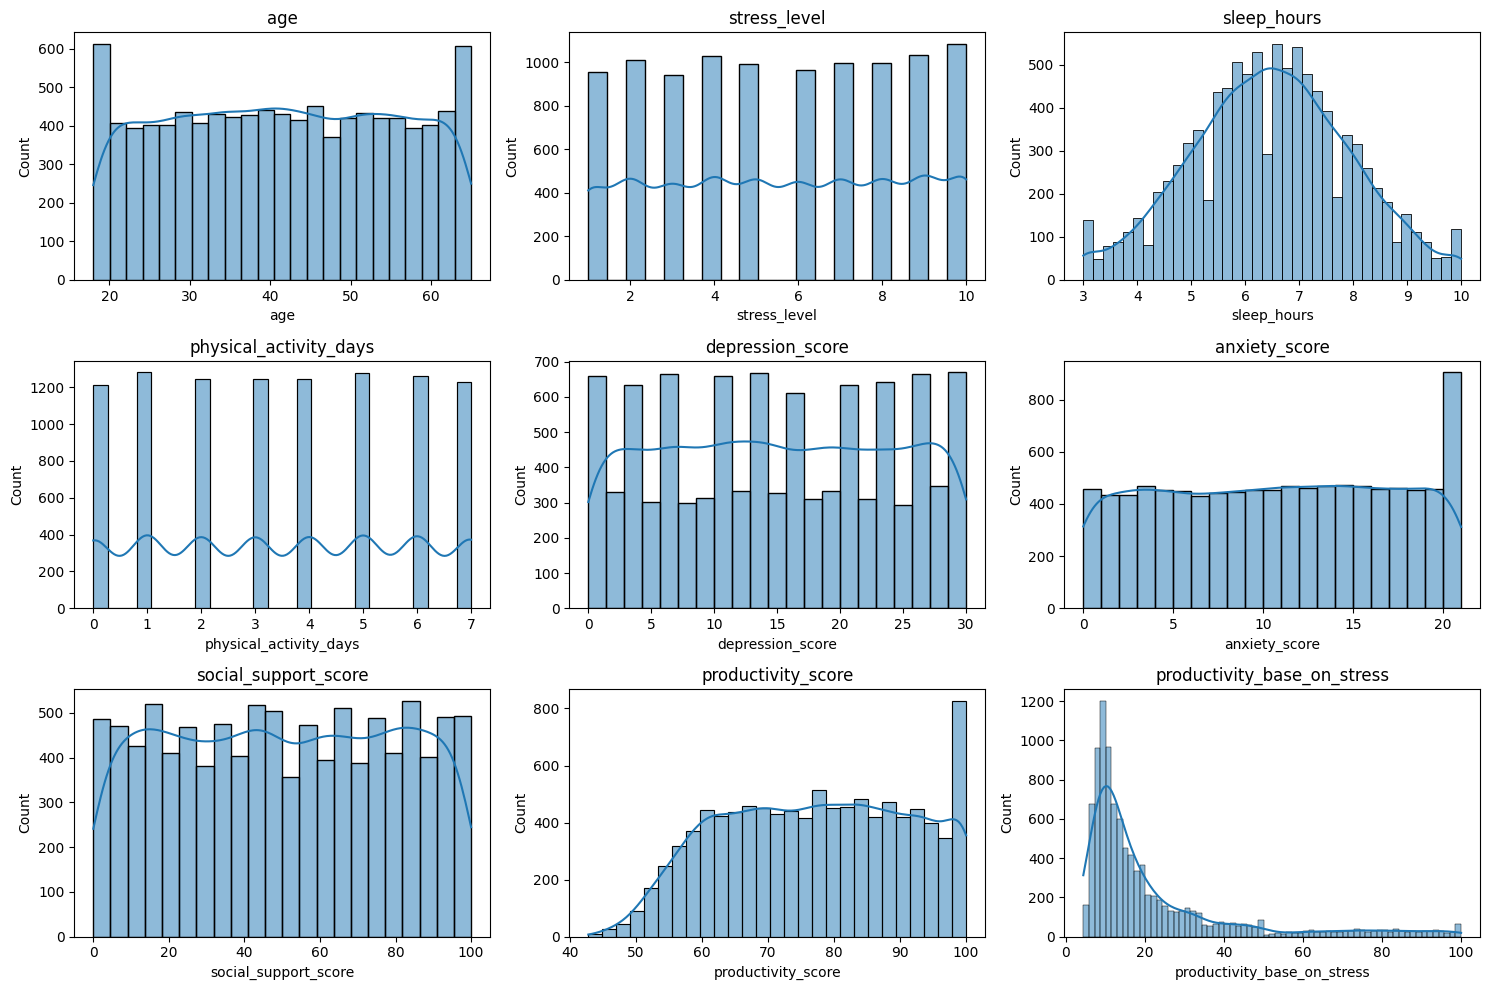

In [9]:
# Histogram cho các cột số
d.histogram()

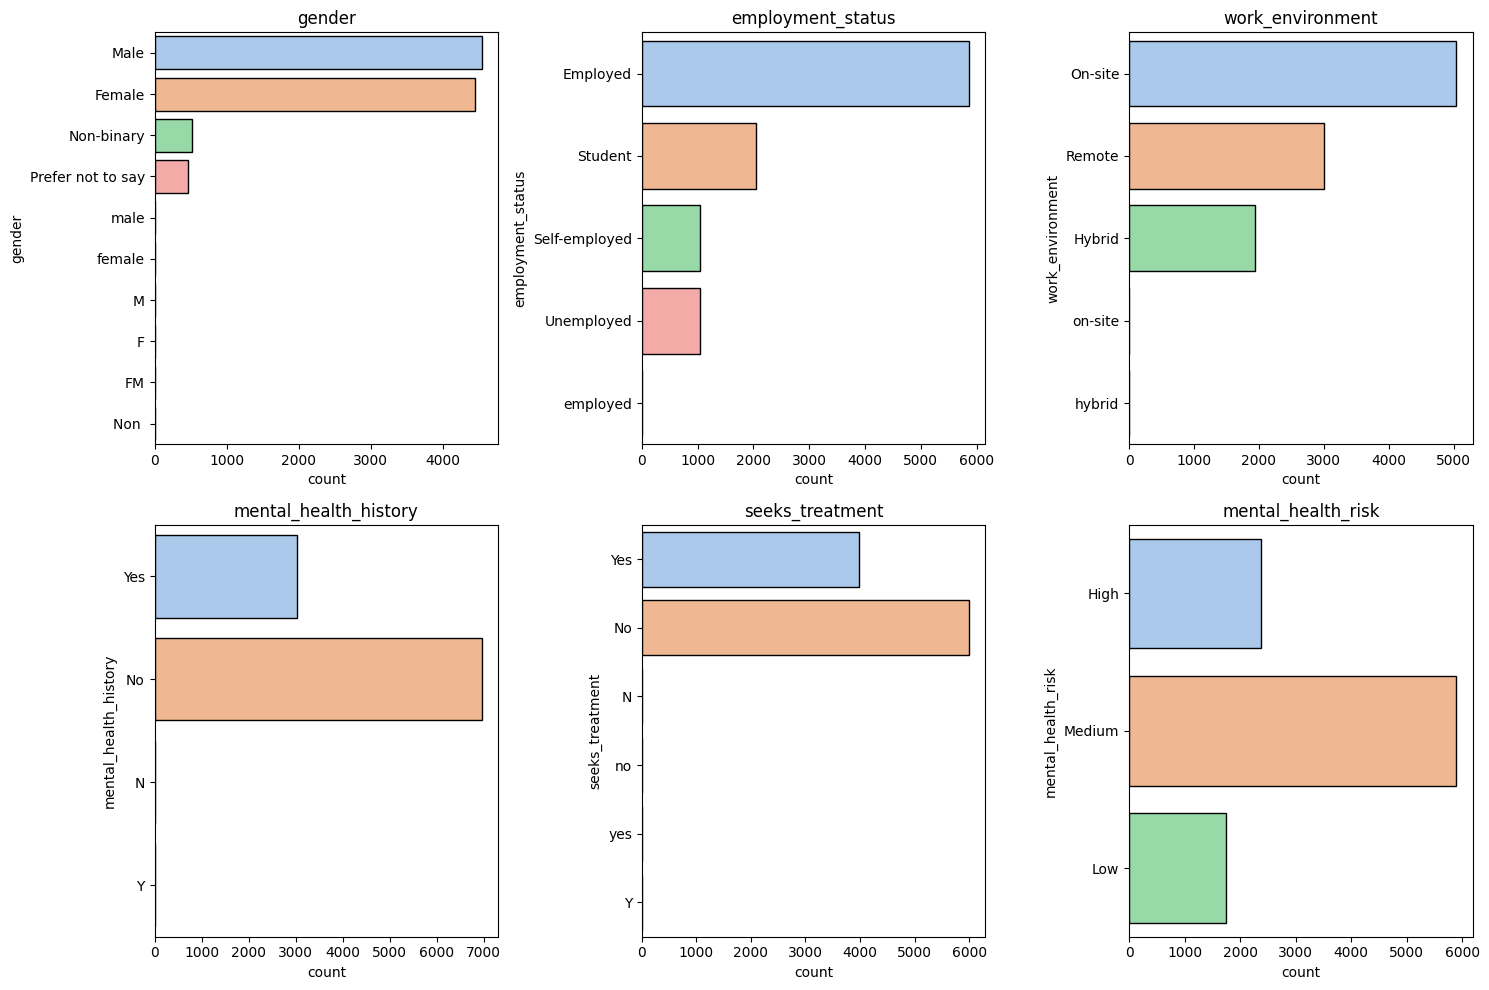

In [10]:
# Barplot cho các cột categorical
d.barplot()

In [ ]:
# KDE plot cho các cột số theo target_col
d.kde_by_target()

## **2.3. HANDLE MISSING VALUE**

In [11]:
# Xử lý dữ liệu thiếu
d.handle_missing_numeric()
d.handle_missing_categorical()

10000 rows, 15 cols

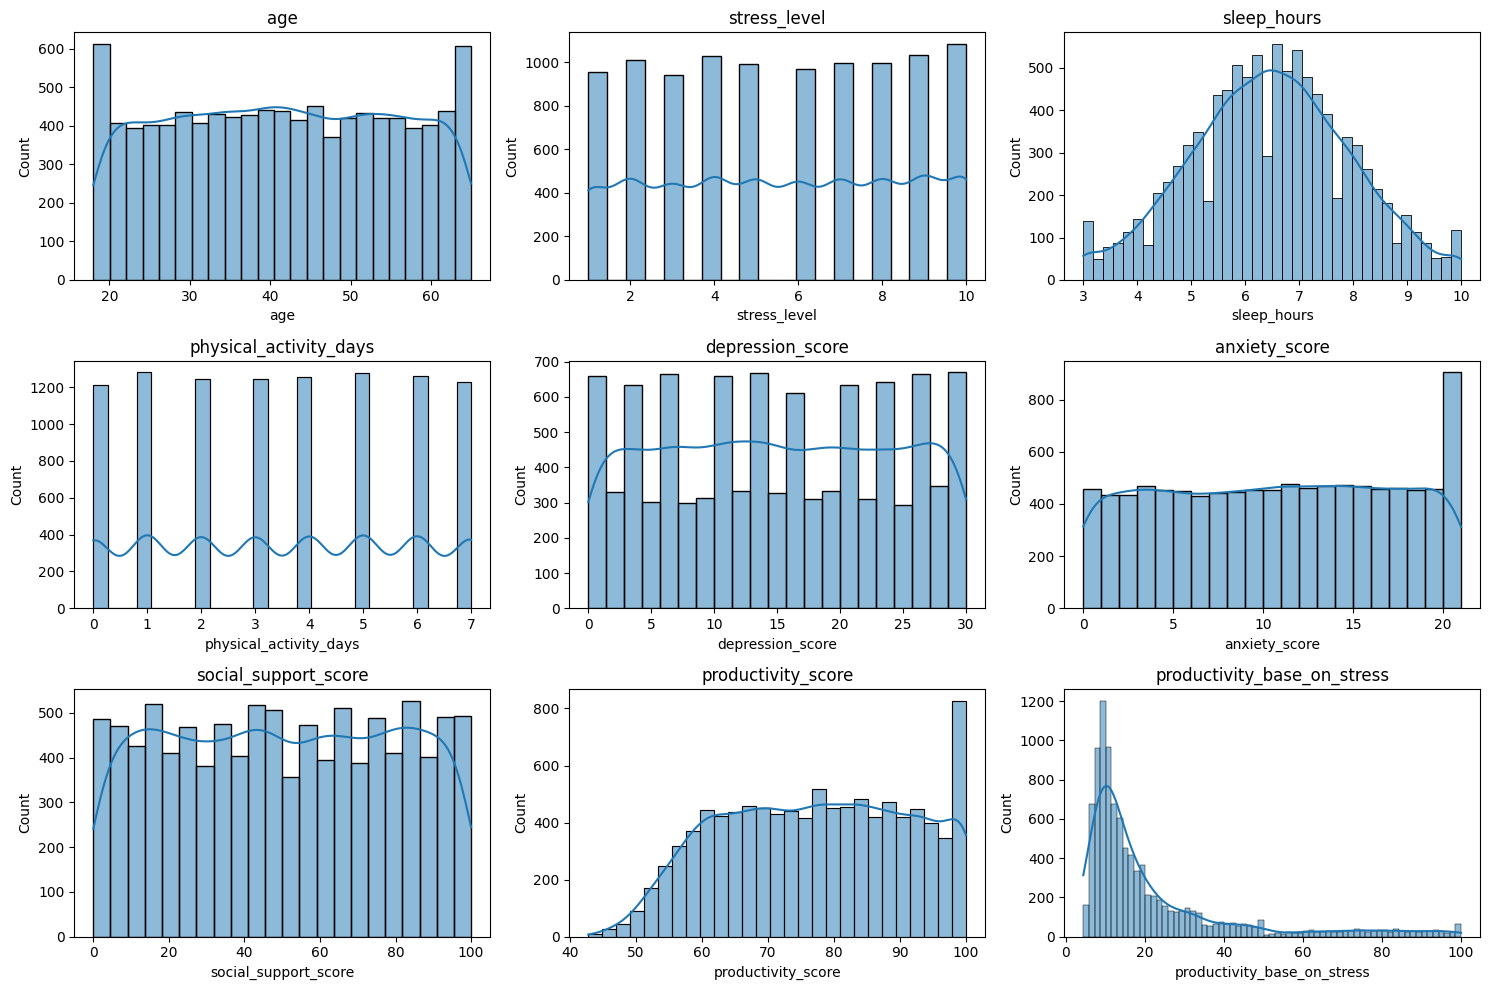

In [12]:
# Kiểm tra lại dữ liệu số sau khi xử lý giá trị thiếu
d.histogram()

## **2.4. NORMALIZE DATA**

In [13]:
# Chuẩn hóa đữ liệu trong các cột categorical
d.normalize_categorical()

********************
gender
Male                 4544
Female               4453
Non-binary            520
Prefer not to say     466
male                    9
M                       4
female                  1
F                       1
FM                      1
Non                     1
Name: count, dtype: int64
********************
employment_status
Employed         5871
Student          2042
Self-employed    1044
Unemployed       1042
employed            1
Name: count, dtype: int64
********************
work_environment
On-site    5043
Remote     3009
Hybrid     1946
on-site       1
hybrid        1
Name: count, dtype: int64
********************
mental_health_history
No     6970
Yes    3025
N         3
Y         2
Name: count, dtype: int64
********************
seeks_treatment
No     6009
Yes    3985
N         3
no        1
yes       1
Y         1
Name: count, dtype: int64
********************
mental_health_risk
Medium    5892
High      2369
Low       1739
Name: count, dtype: int64

***

10000 rows, 15 cols

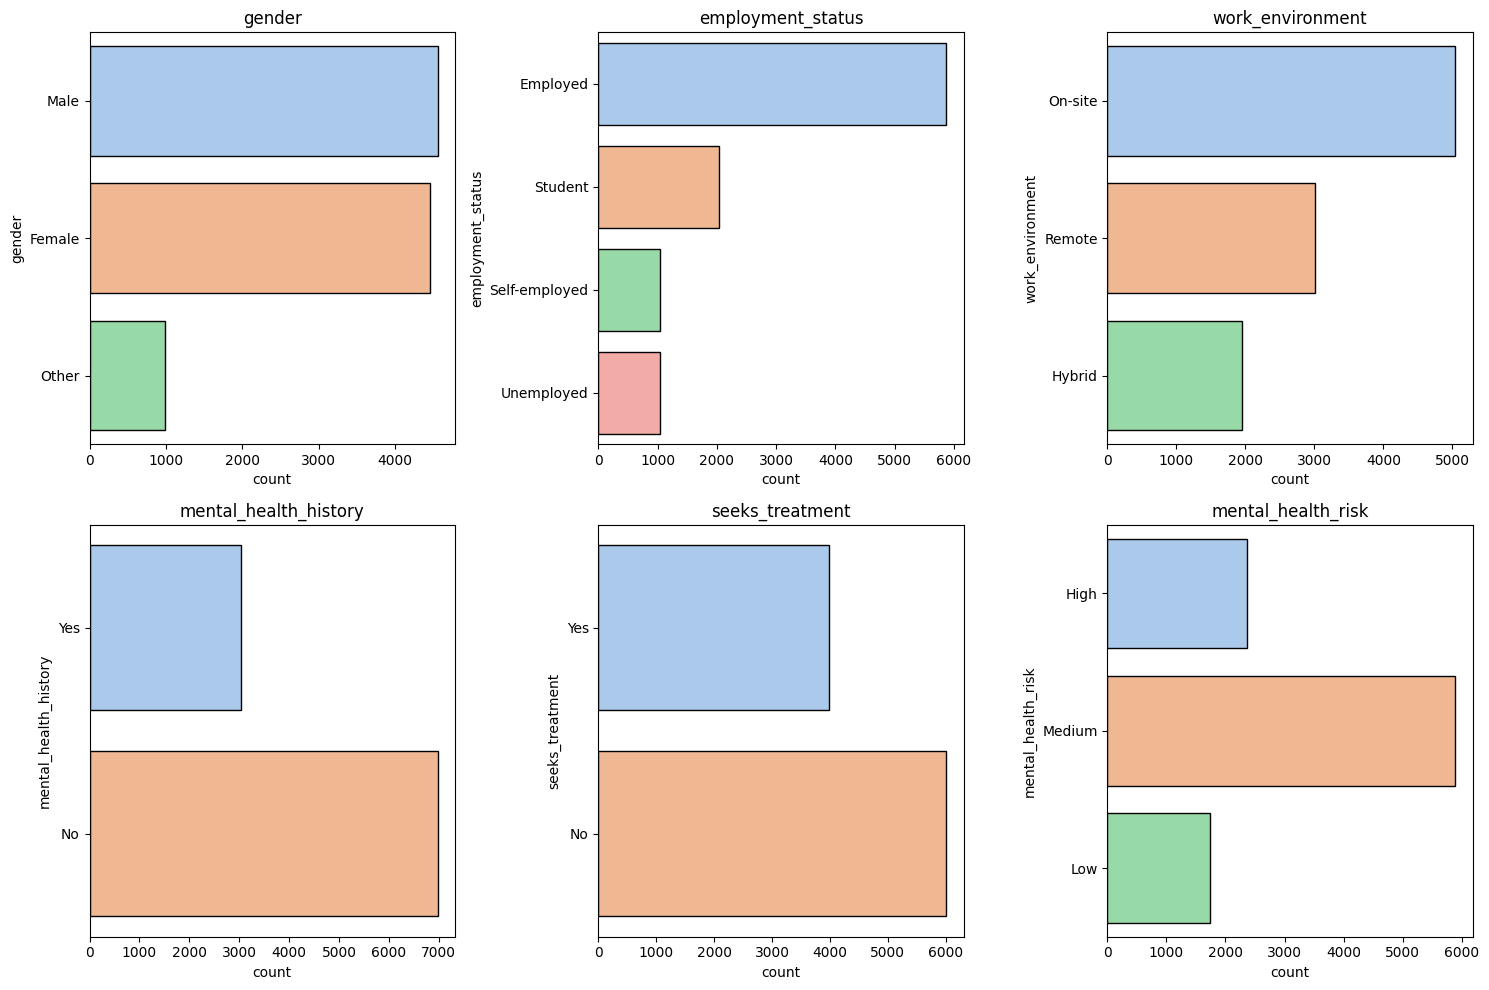

In [14]:
# Kiểm tra sau khi chuẩn hóa
d.barplot()

## **2.5. HANDLE OUTLIER**

In [15]:
# Kiểm tra giá trị skew cho các cột số
d.skewness_for_numeric_cols()

Skew cho các cột:
age                           -0.001251
stress_level                  -0.020437
sleep_hours                   -0.002150
physical_activity_days        -0.004078
depression_score               0.001475
anxiety_score                 -0.023253
social_support_score          -0.004649
productivity_score            -0.079479
productivity_base_on_stress    2.079007
dtype: float64


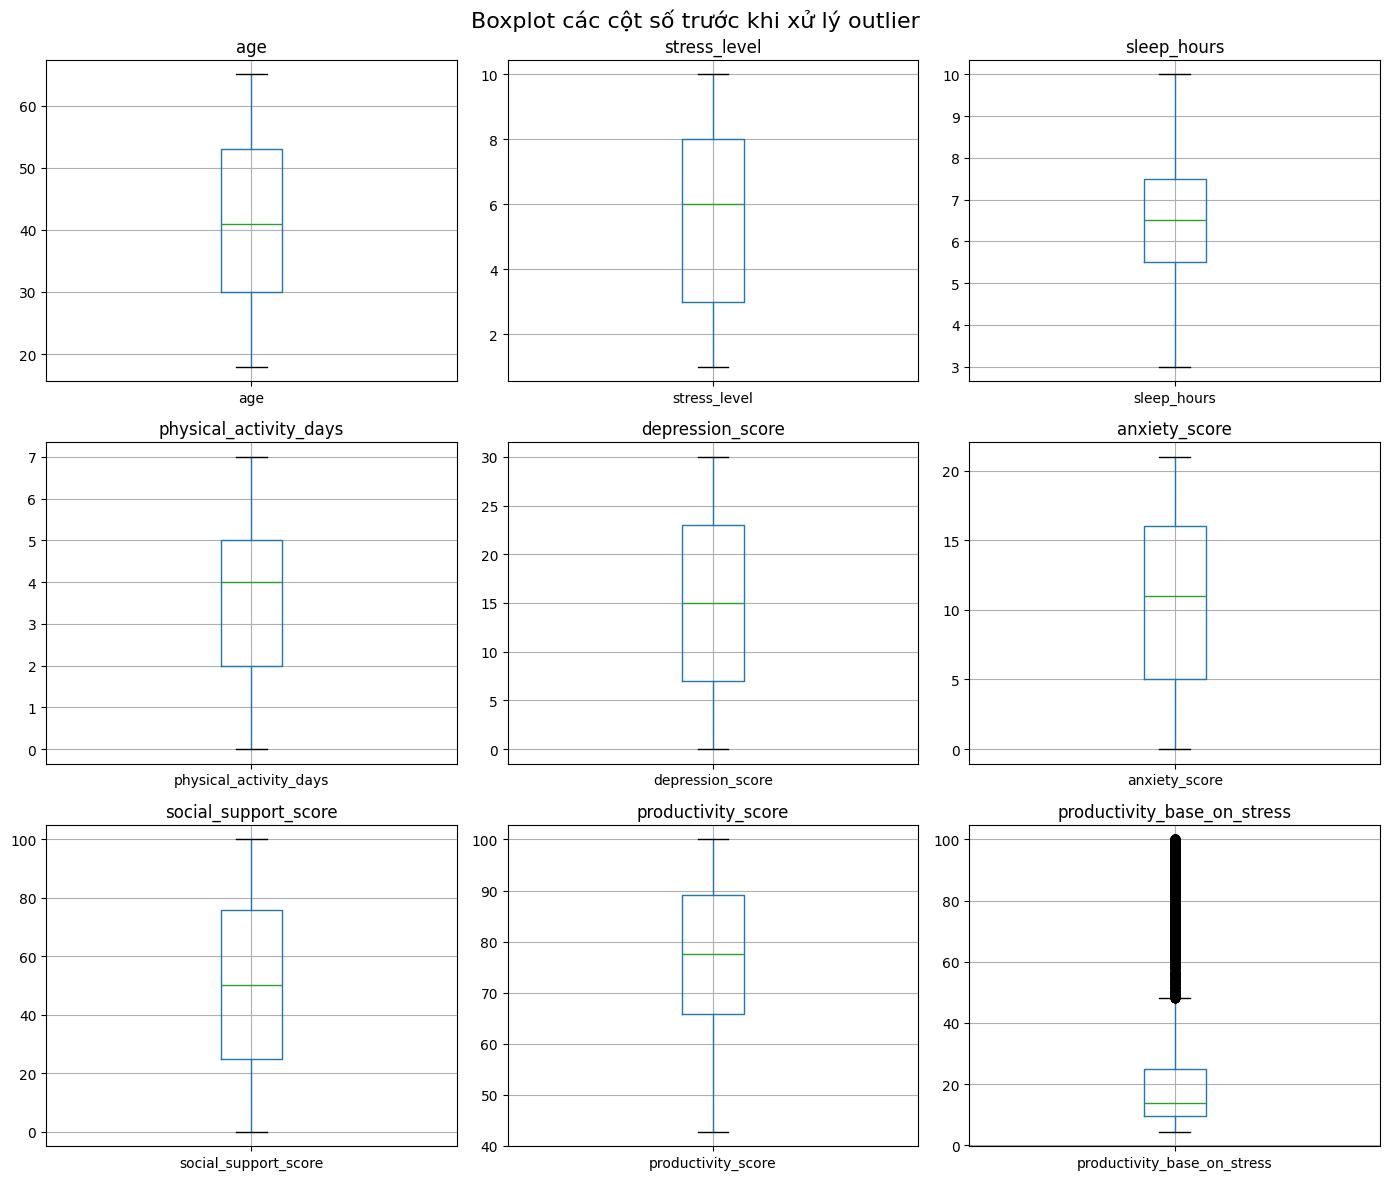

In [16]:
# Boxplot
d.boxplot_for_numeric_cols(title="Boxplot các cột số trước khi xử lý outlier")

In [17]:
# Xử lý outlier
d.handle_outlier()

10000 rows, 15 cols

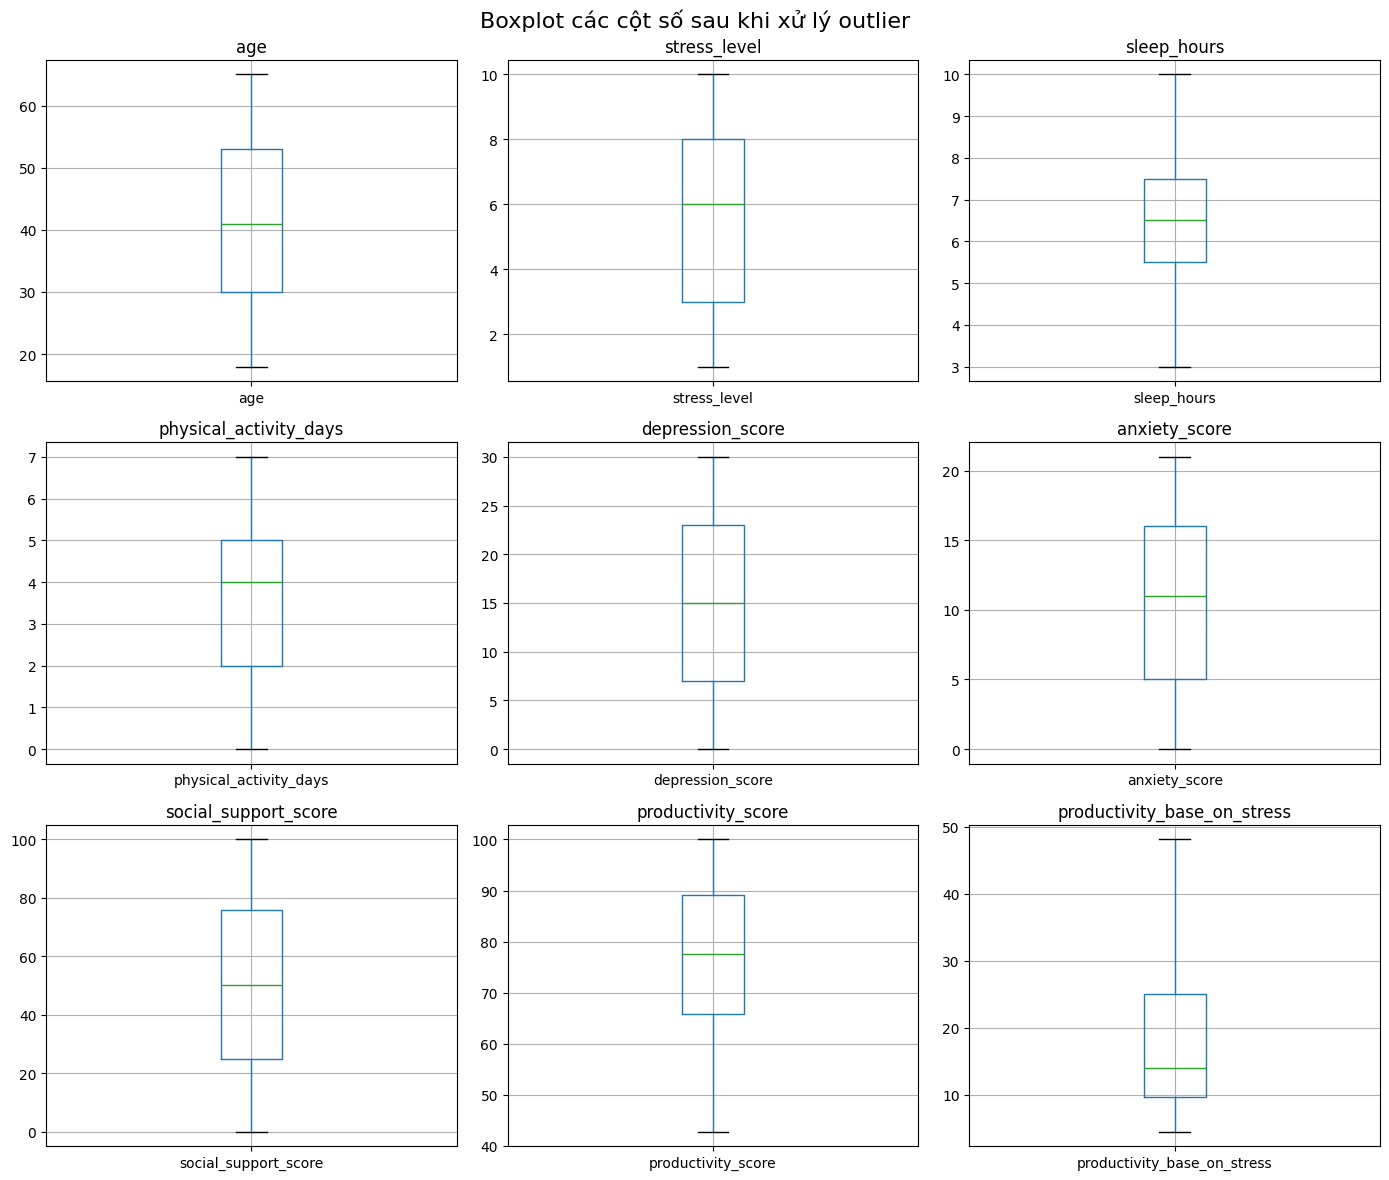

In [18]:
# Boxplot sau khi xử lý
d.boxplot_for_numeric_cols(title="Boxplot các cột số sau khi xử lý outlier")

## **2.6. ENCODE, SCALE VÀ KIỂM TRA TƯƠNG QUAN**

In [19]:
# Encode
encoders = d.encode_categorical()

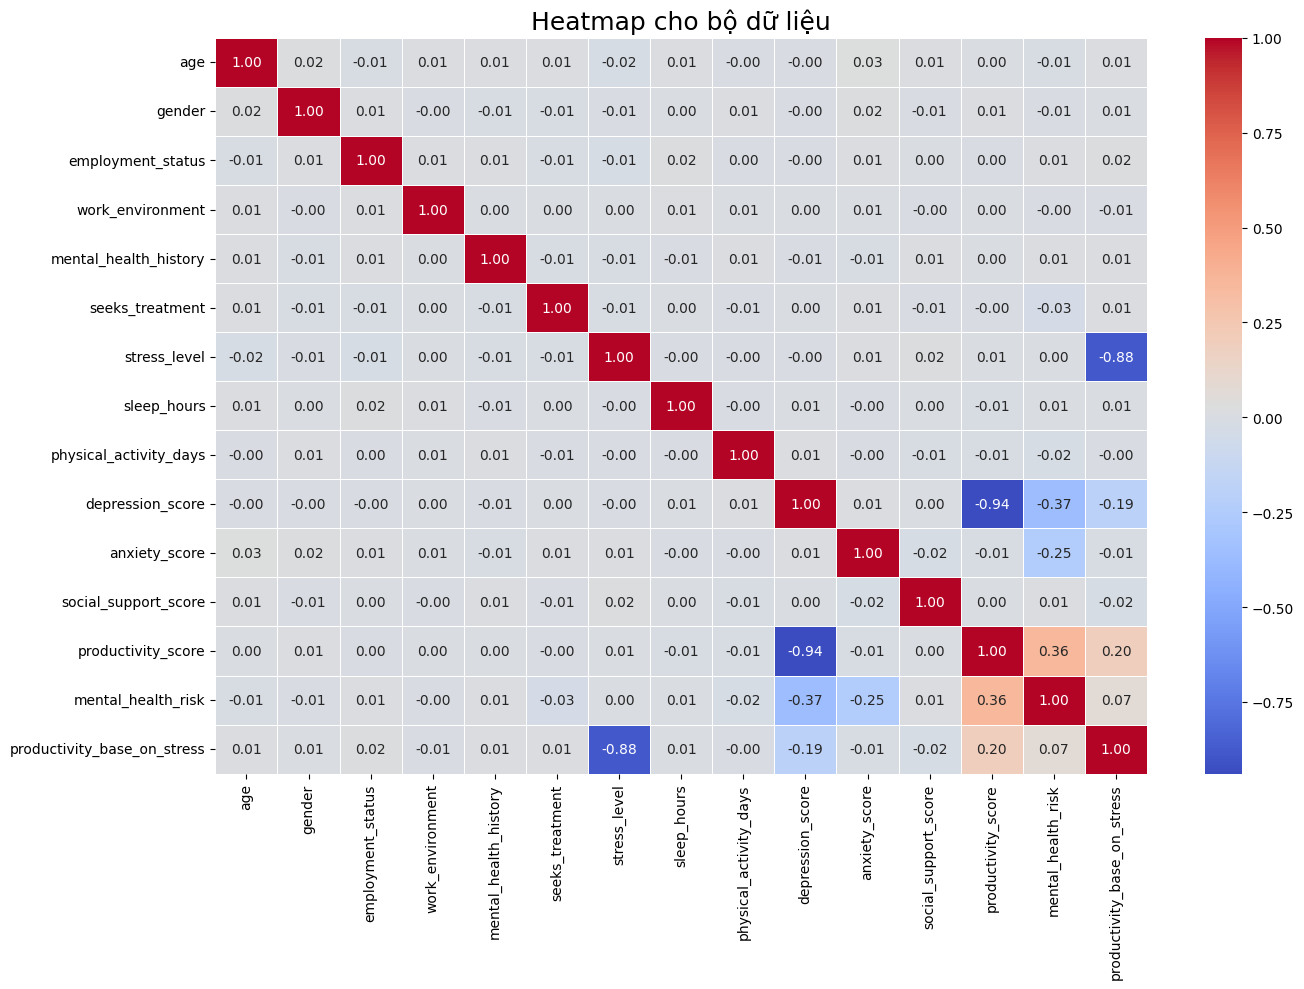

In [20]:
# Vẽ heatmap cho toàn bộ dữ liệu
d.heatmap()

<Figure size 1500x500 with 0 Axes>

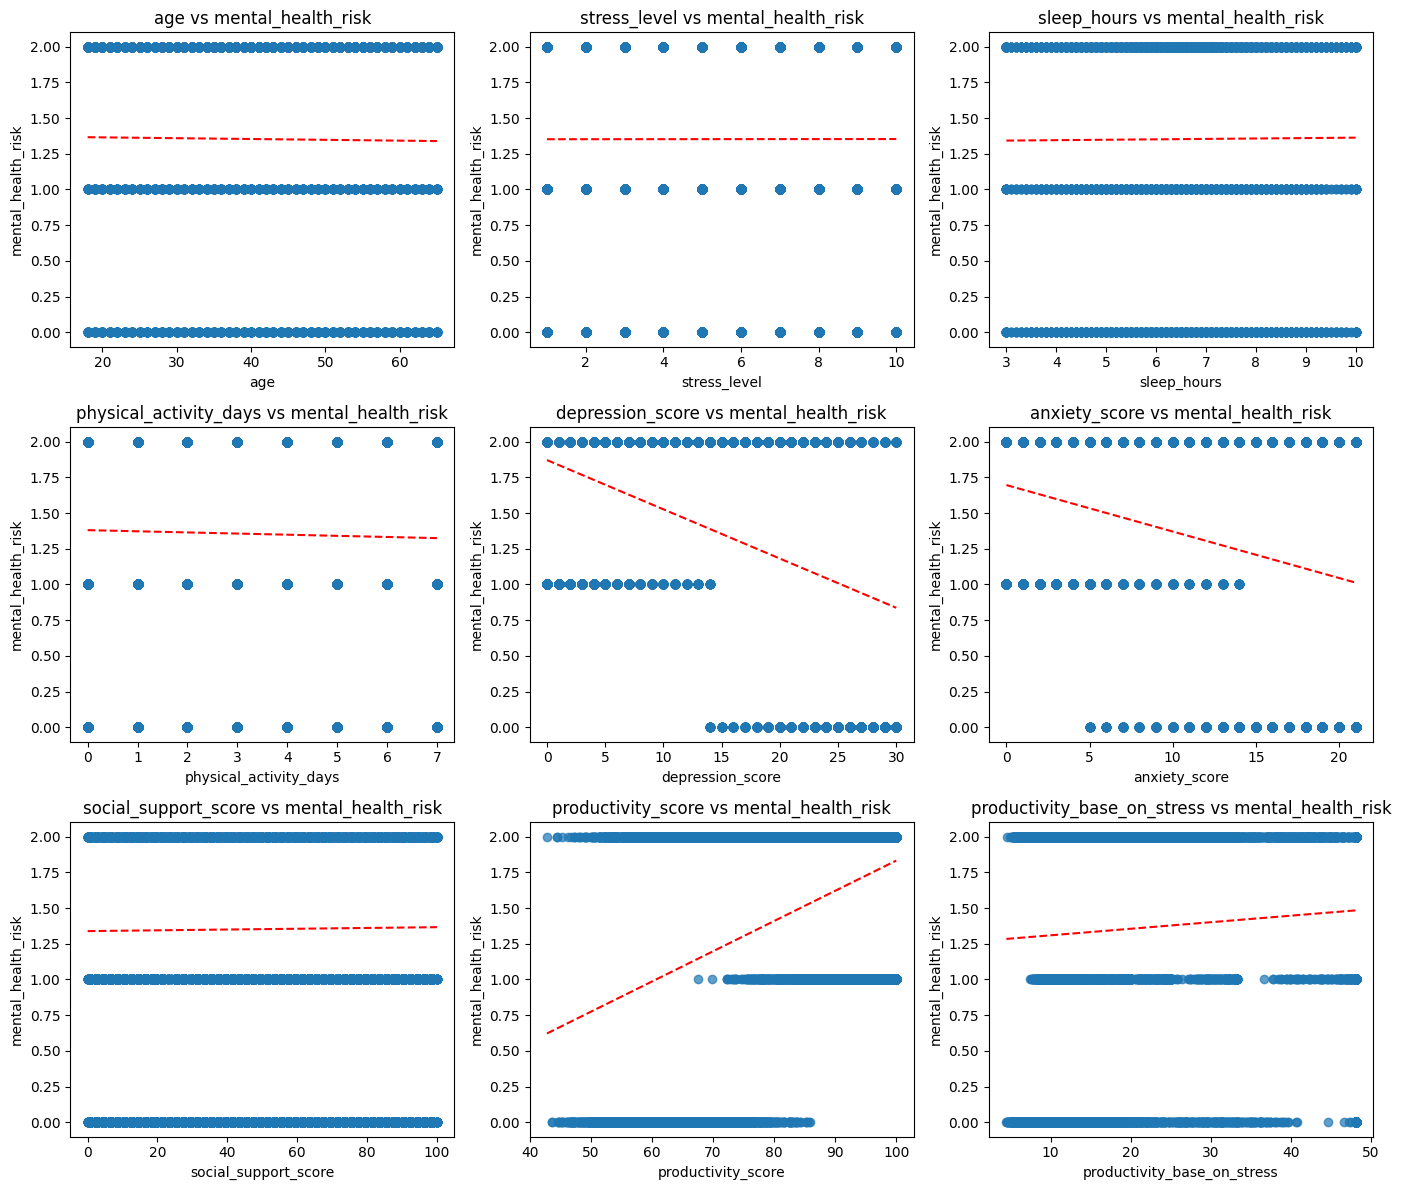

In [21]:
# Kiểm tra tương quan giữa các dữ liệu số với target
d.scatter(target="mental_health_risk")

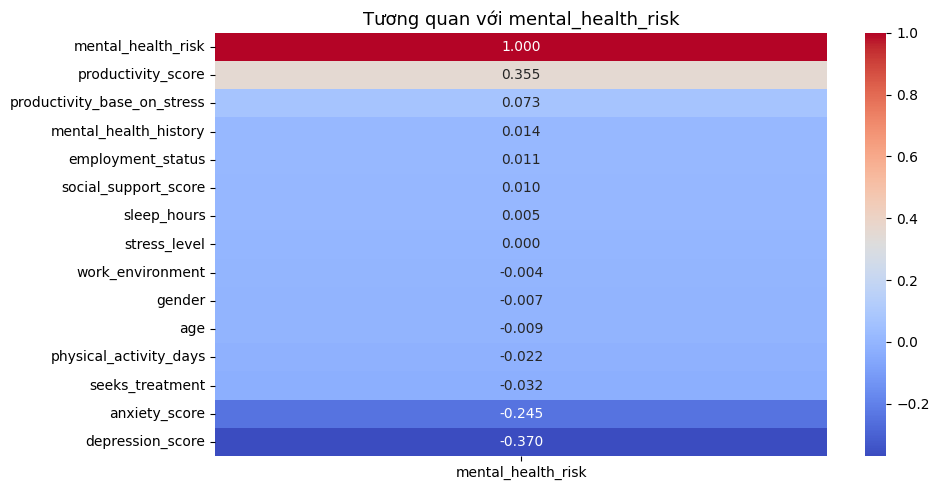

In [22]:
# Tương quan với cột target
d.heatmap_one_column(target="mental_health_risk")

In [23]:
# Scale dữ liệu
scaler = d.scale_features()

## **2.7. XUẤT DỮ LIỆU ĐÃ TIỀN XỬ LÝ**

In [24]:
d.new_data(file_name="new_mental_health_dataset.csv")

# **3. MODEL**

In [25]:
# Load dữ liệu
trainer = ModelTrainer.load_data("new_mental_health_dataset.csv", target="mental_health_risk")

# Chia dữ liệu
trainer.split_data()

## **3.1. LOGISTIC REGRESSION**

In [26]:
# Huấn luyện
trainer.train_model(model_type="logistic")

# Đánh giá 
trainer.evaluate()

accuracy  precision    recall        f1 roc_auc  roc_auc_ovr
0    0.9785   0.966906  0.987832  0.976835    None     0.999995

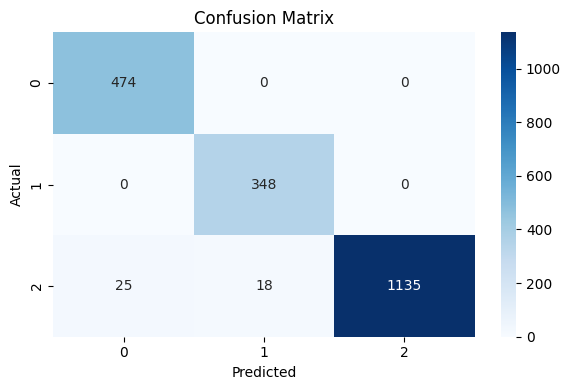

In [27]:
# Confusion Matrix
trainer.visualize_confusion_matrix()

=============== SHAP Force Plot cho sample index = 200 ===============


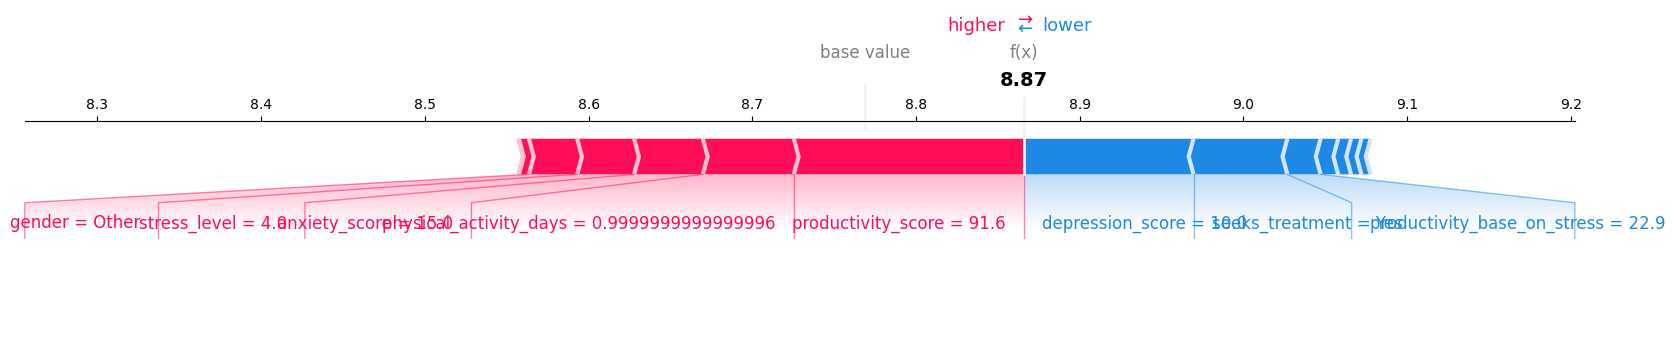

In [28]:
trainer.shap_force_plot(sample_index=200, encoders=encoders, scaler=scaler, num_cols=num_cols)

## **3.2. RANDOM FOREST**

In [29]:
# Huấn luyện
trainer.train_model(model_type="randomforest")

# Đánh giá 
trainer.evaluate()

accuracy  precision    recall        f1 roc_auc  roc_auc_ovr
0    0.9735    0.97709  0.964272  0.970407    None     0.998901

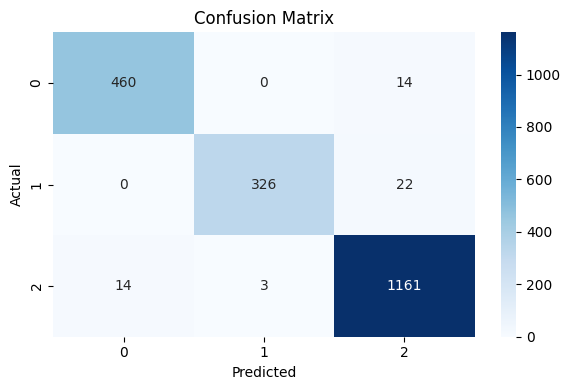

In [30]:
# Confusion Matrix
trainer.visualize_confusion_matrix()

=============== SHAP Force Plot cho sample index = 200 ===============


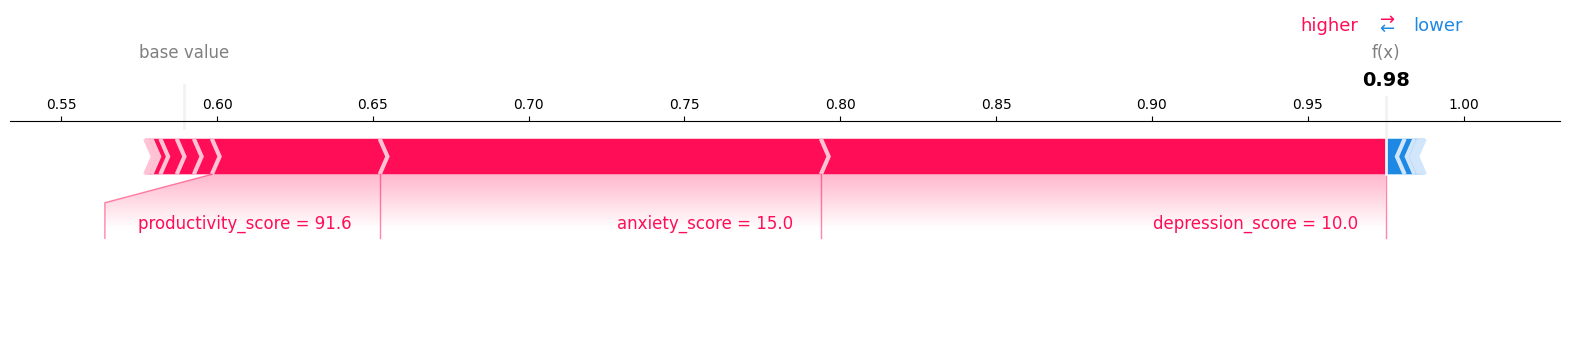

In [ ]:
trainer.shap_force_plot(sample_index=200, encoders=encoders, scaler=scaler, num_cols=num_cols)

## **3.3. LightGBM**

In [31]:
# Huấn luyện (dùng dữ liệu không encode)
trainer.train_model(model_type="lightgbm")

# Đánh giá 
trainer.evaluate()

accuracy  precision  recall   f1 roc_auc  roc_auc_ovr
0       1.0        1.0     1.0  1.0    None          1.0

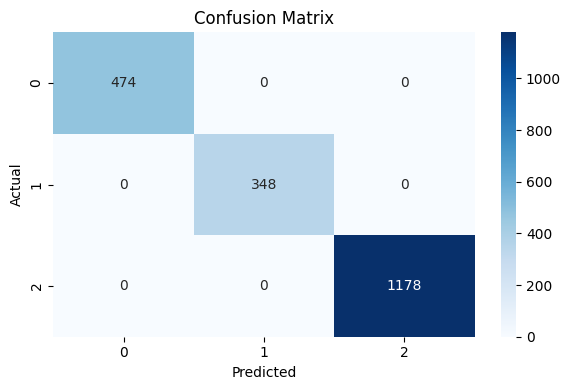

In [32]:
# Confusion Matrix
trainer.visualize_confusion_matrix()

=============== SHAP Force Plot cho sample index = 200 ===============


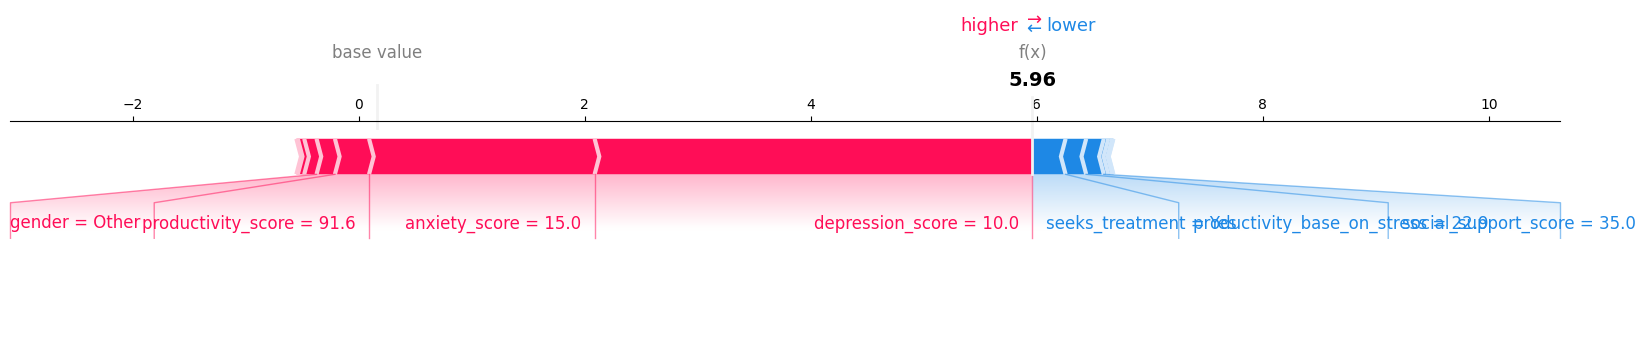

In [ ]:
trainer.shap_force_plot(sample_index=200, encoders=encoders, scaler=scaler, num_cols=num_cols)

## **3.4. XGBOOST**

In [ ]:
# Huấn luyện mô hình
trainer.train_model(model_type="xgboost")

# Đánh giá 
trainer.evaluate()

accuracy  precision  recall   f1 roc_auc  roc_auc_ovr
0       1.0        1.0     1.0  1.0    None          1.0

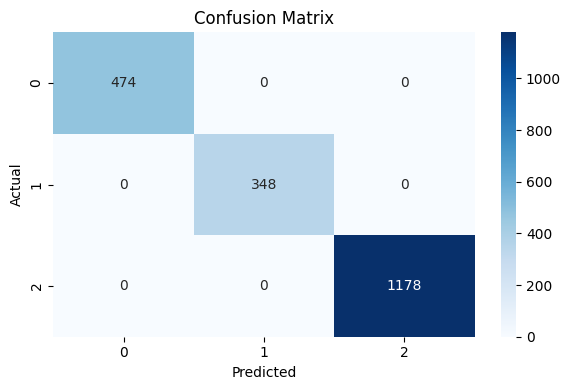

In [ ]:
# Confusion Matrix
trainer.visualize_confusion_matrix()

=============== SHAP Force Plot cho sample index = 200 ===============


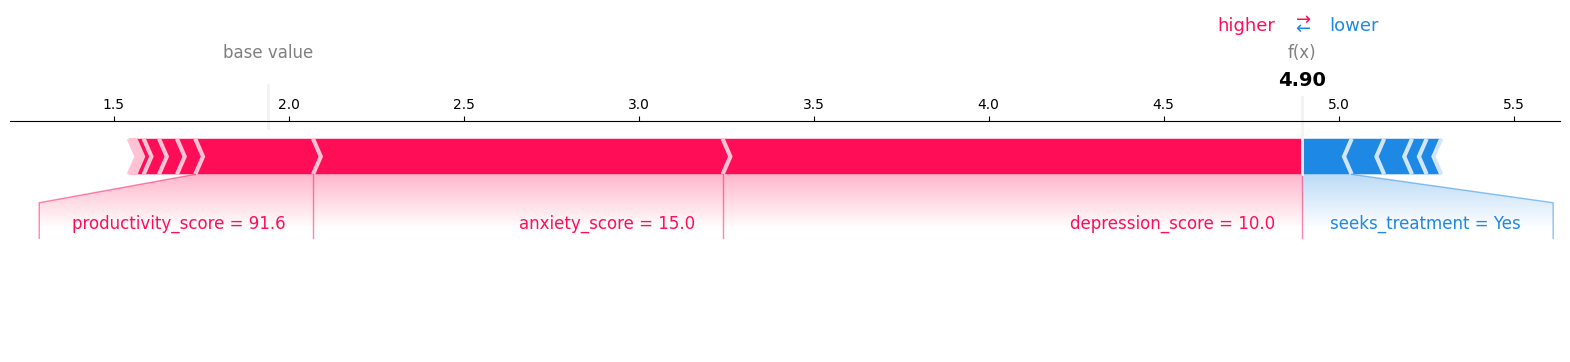

In [ ]:
trainer.shap_force_plot(sample_index=200, encoders=encoders, scaler=scaler, num_cols=num_cols)

## **3.5. BEST MODEL**

In [ ]:
best_model = trainer.best_model(method="optuna")

In [ ]:
print("Mô hình tốt nhất:", best_model["best_model_type"])

Mô hình tốt nhất: xgboost


In [ ]:
print("Đánh giá cho tất cả các mô hình:")
best_model["all_metrics"]

Đánh giá cho tất cả các mô hình:


model_type  accuracy  precision    recall        f1 roc_auc  roc_auc_ovr
0      logistic    0.9995   0.999298  0.999717  0.999507    None     0.999998
1  randomforest    0.9725   0.977250  0.962190  0.969377    None     0.998744
2       xgboost    1.0000   1.000000  1.000000  1.000000    None     1.000000
3      lightgbm    1.0000   1.000000  1.000000  1.000000    None     1.000000

In [ ]:
# Giải thích model
trainer.explain_with_shap()

{'explainer': <shap.explainers._tree.TreeExplainer at 0x23a570f55b0>,
 'shap_values': array([[[ 9.8283924e-03,  8.3510950e-04, -5.9994077e-03],
         [-8.2558725e-04, -2.0078967e-04, -2.7079331e-03],
         [ 1.5933081e-03, -3.0525934e-04,  3.2655383e-03],
         ...,
         [ 1.7088091e-03, -3.3895336e-03,  8.0526890e-03],
         [ 2.7572140e-01, -3.4125663e-02, -1.4354378e-01],
         [ 6.1086798e-03, -2.7483227e-04, -1.4188571e-02]],
 
        [[ 1.6132889e-02, -1.0224752e-02, -4.2740572e-03],
         [-7.8151422e-04,  8.5758819e-04, -5.6790968e-04],
         [ 6.4984951e-03,  1.2502732e-04, -2.0355021e-03],
         ...,
         [ 4.5153685e-03, -3.7227306e-03,  1.5911751e-03],
         [-2.3270356e-02, -9.0258755e-03,  1.6259611e-02],
         [-1.8401046e-03,  6.0183235e-04,  1.5948758e-04]],
 
        [[-1.5000857e-02,  2.4633668e-03,  2.7636543e-03],
         [-1.9594161e-03,  9.6529076e-04, -4.3095293e-04],
         [-2.6692736e-03, -5.3566165e-04,  5.7666458e-0

====================== BEESWARM ======================


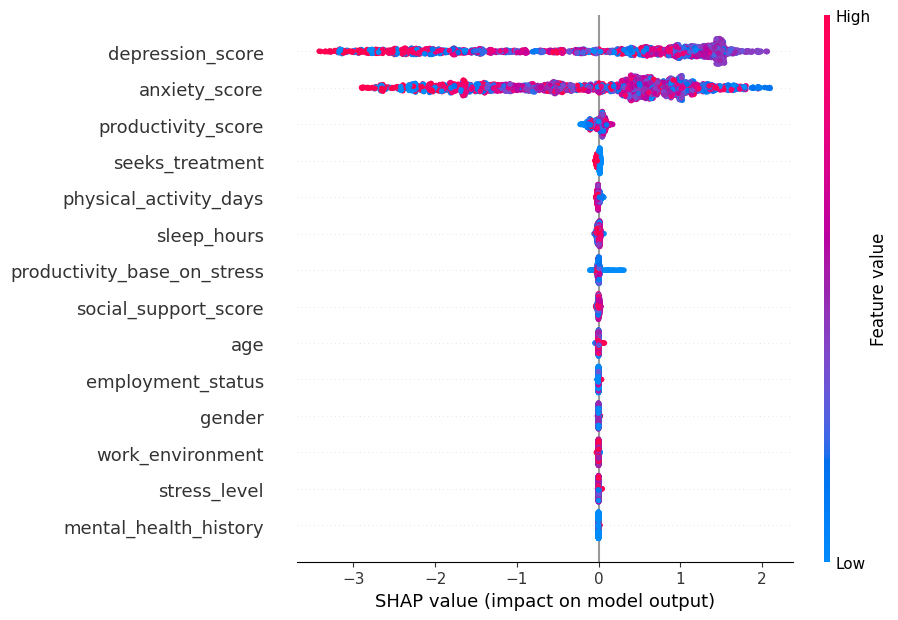

In [ ]:
# Vẽ SHAP plot
trainer.shap_beeswarm(sample_index=200)

======================== DEPENDENCE PLOTS ========================


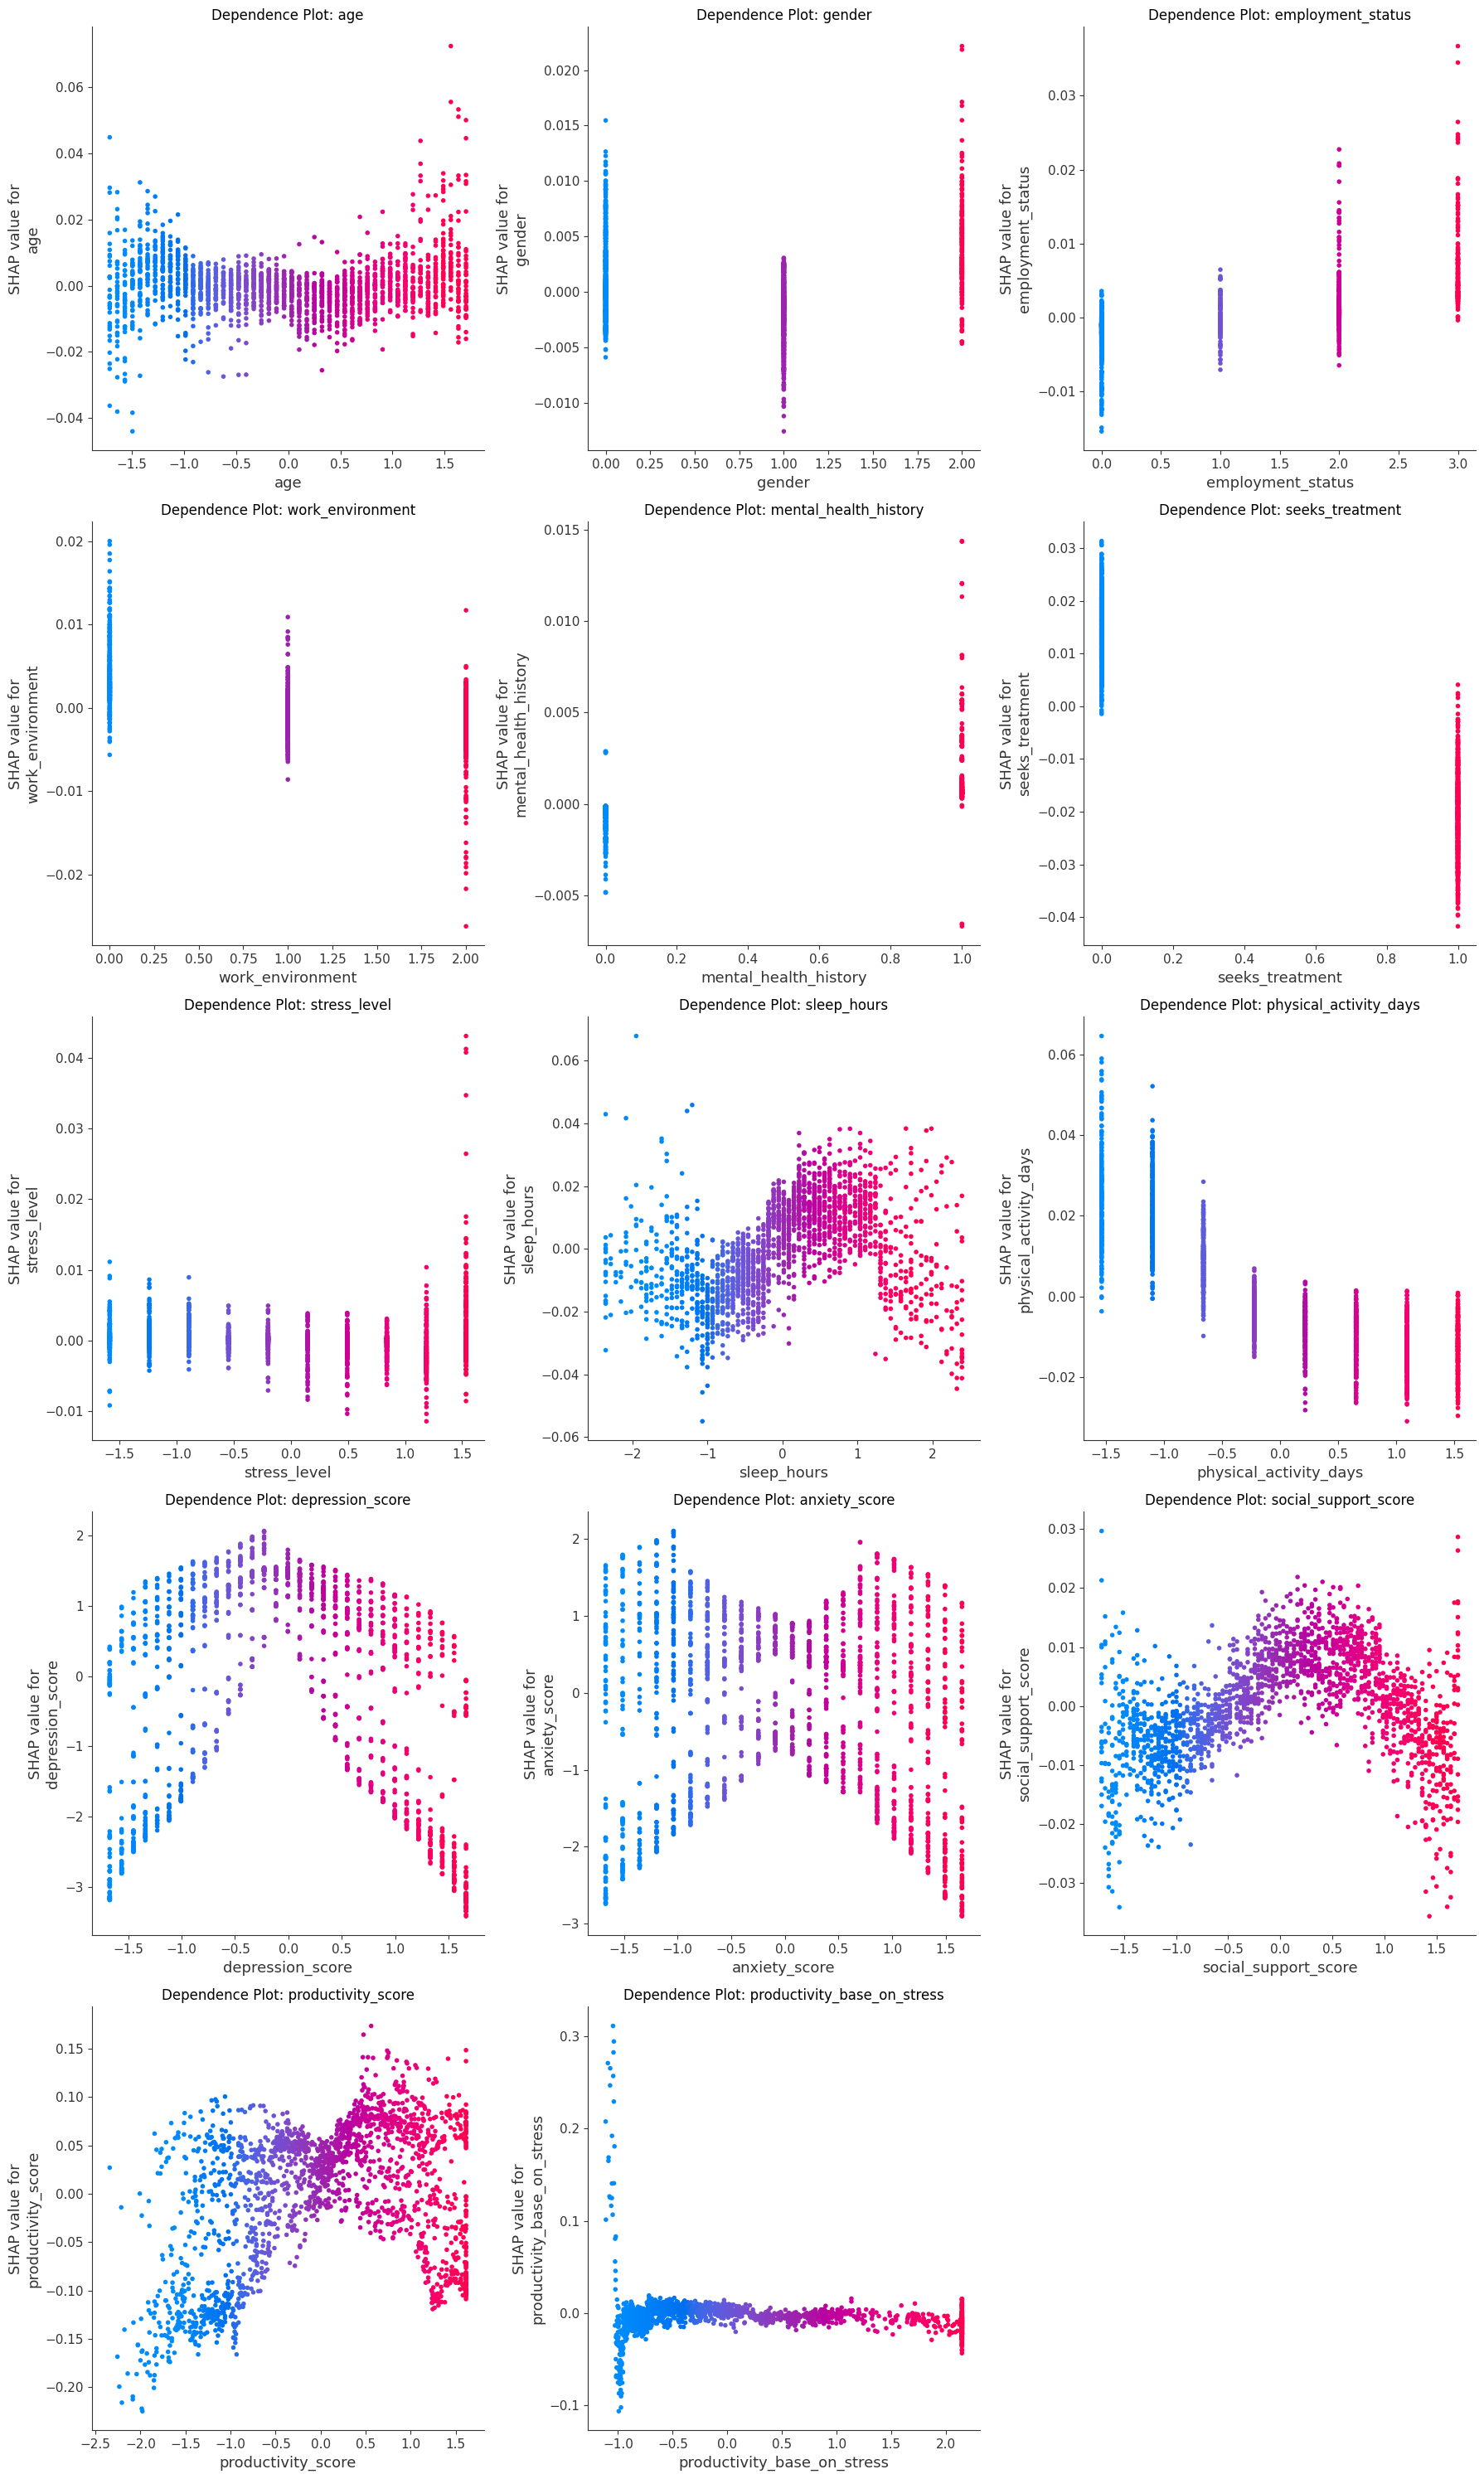

In [ ]:
trainer.shap_dependece_plot(sample_index=200)

=============== SHAP Force Plot cho sample index = 200 ===============


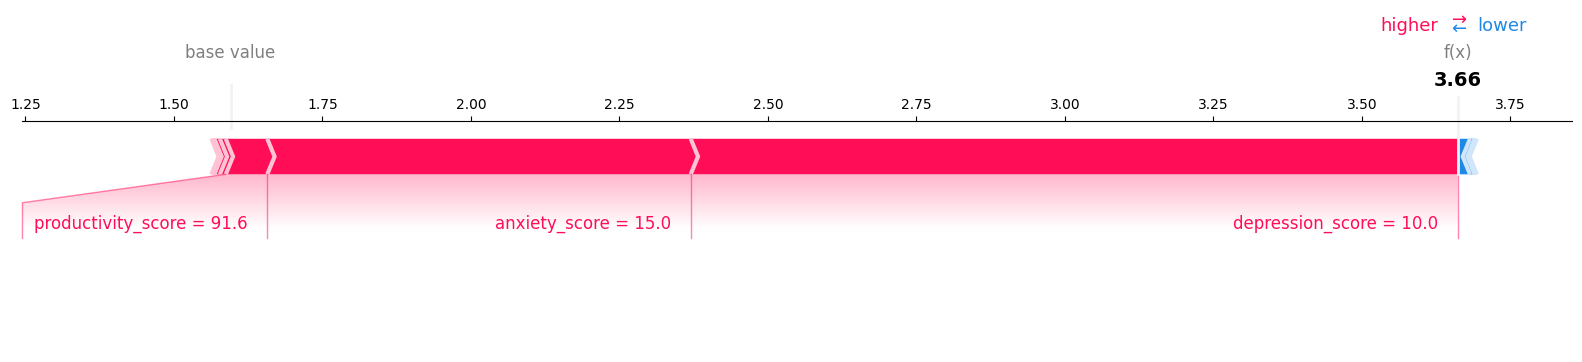

In [ ]:
trainer.shap_force_plot(sample_index=200, encoders=encoders, scaler=scaler, num_cols=num_cols)

In [ ]:
# Lưu model
trainer.save_model("Best_model_with_optuna")

In [ ]:
# Tối ưu với grid
best_model = trainer.best_model()

Fitting 3 folds for each of 81 candidates, totalling 243 fits


In [ ]:
print("Mô hình tốt nhất:", best_model["best_model_type"])

Mô hình tốt nhất: xgboost


In [ ]:
print("Đánh giá cho tất cả các mô hình:")
best_model["all_metrics"]

Đánh giá cho tất cả các mô hình:


model_type  accuracy  precision    recall        f1 roc_auc  roc_auc_ovr
0      logistic    0.9995   0.999298  0.999717  0.999507    None     0.999998
1  randomforest    0.9725   0.977250  0.962190  0.969377    None     0.998744
2       xgboost    1.0000   1.000000  1.000000  1.000000    None     1.000000
3      lightgbm    1.0000   1.000000  1.000000  1.000000    None     1.000000

In [ ]:
# Giải thích model
trainer.explain_with_shap()

{'explainer': <shap.explainers._tree.TreeExplainer at 0x23a5c324af0>,
 'shap_values': array([[[ 3.1248307e-02,  2.2721509e-03, -3.0425902e-02],
         [ 1.8096011e-02, -1.2009064e-03, -1.8530013e-03],
         [ 1.8902973e-04,  1.1185171e-03,  1.9242382e-03],
         ...,
         [-7.0364833e-02,  7.7969546e-04, -6.4426130e-03],
         [ 9.2272222e-02, -7.7473256e-03, -1.1451757e-01],
         [ 1.0888625e-02,  4.4066447e-04, -2.4969861e-02]],
 
        [[ 2.6924115e-02, -6.0439352e-03,  3.3432404e-03],
         [-5.7361489e-03,  1.6152407e-03,  1.0577058e-02],
         [ 3.3508912e-03, -1.2301352e-03, -5.9280638e-04],
         ...,
         [ 1.2954195e-02, -6.9228973e-04,  1.6987234e-02],
         [-4.8392944e-02, -5.0885812e-03,  3.6065843e-02],
         [-1.9134866e-02, -6.1637213e-05,  1.0783327e-02]],
 
        [[-5.3849197e-03,  3.7774362e-03,  4.6637235e-03],
         [-8.4729660e-03,  2.7831523e-03,  4.1047781e-04],
         [-2.5922332e-03,  1.1185170e-03, -6.9041556e-0

====================== BEESWARM ======================


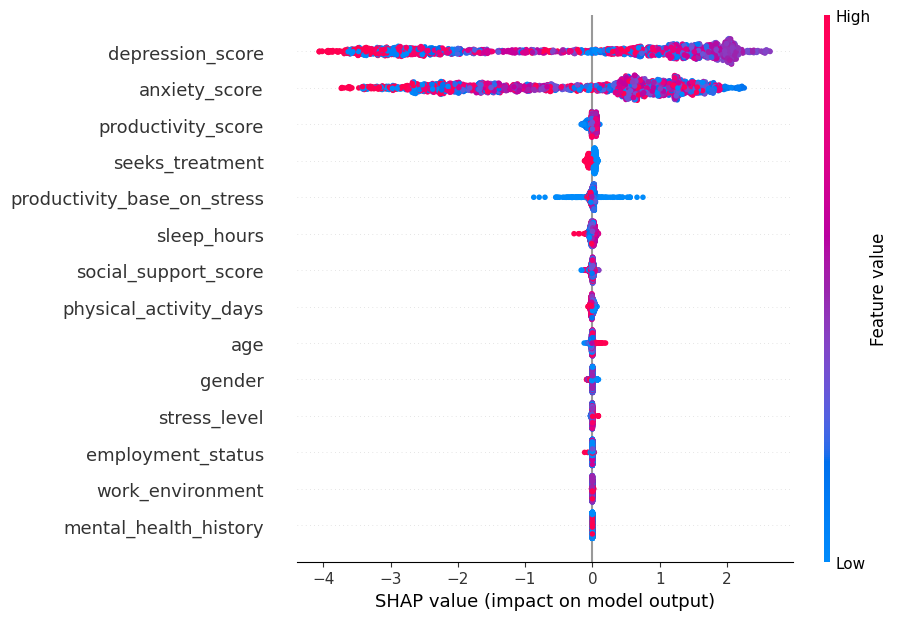

In [ ]:
# Vẽ SHAP plot
trainer.shap_beeswarm(sample_index=200)

======================== DEPENDENCE PLOTS ========================


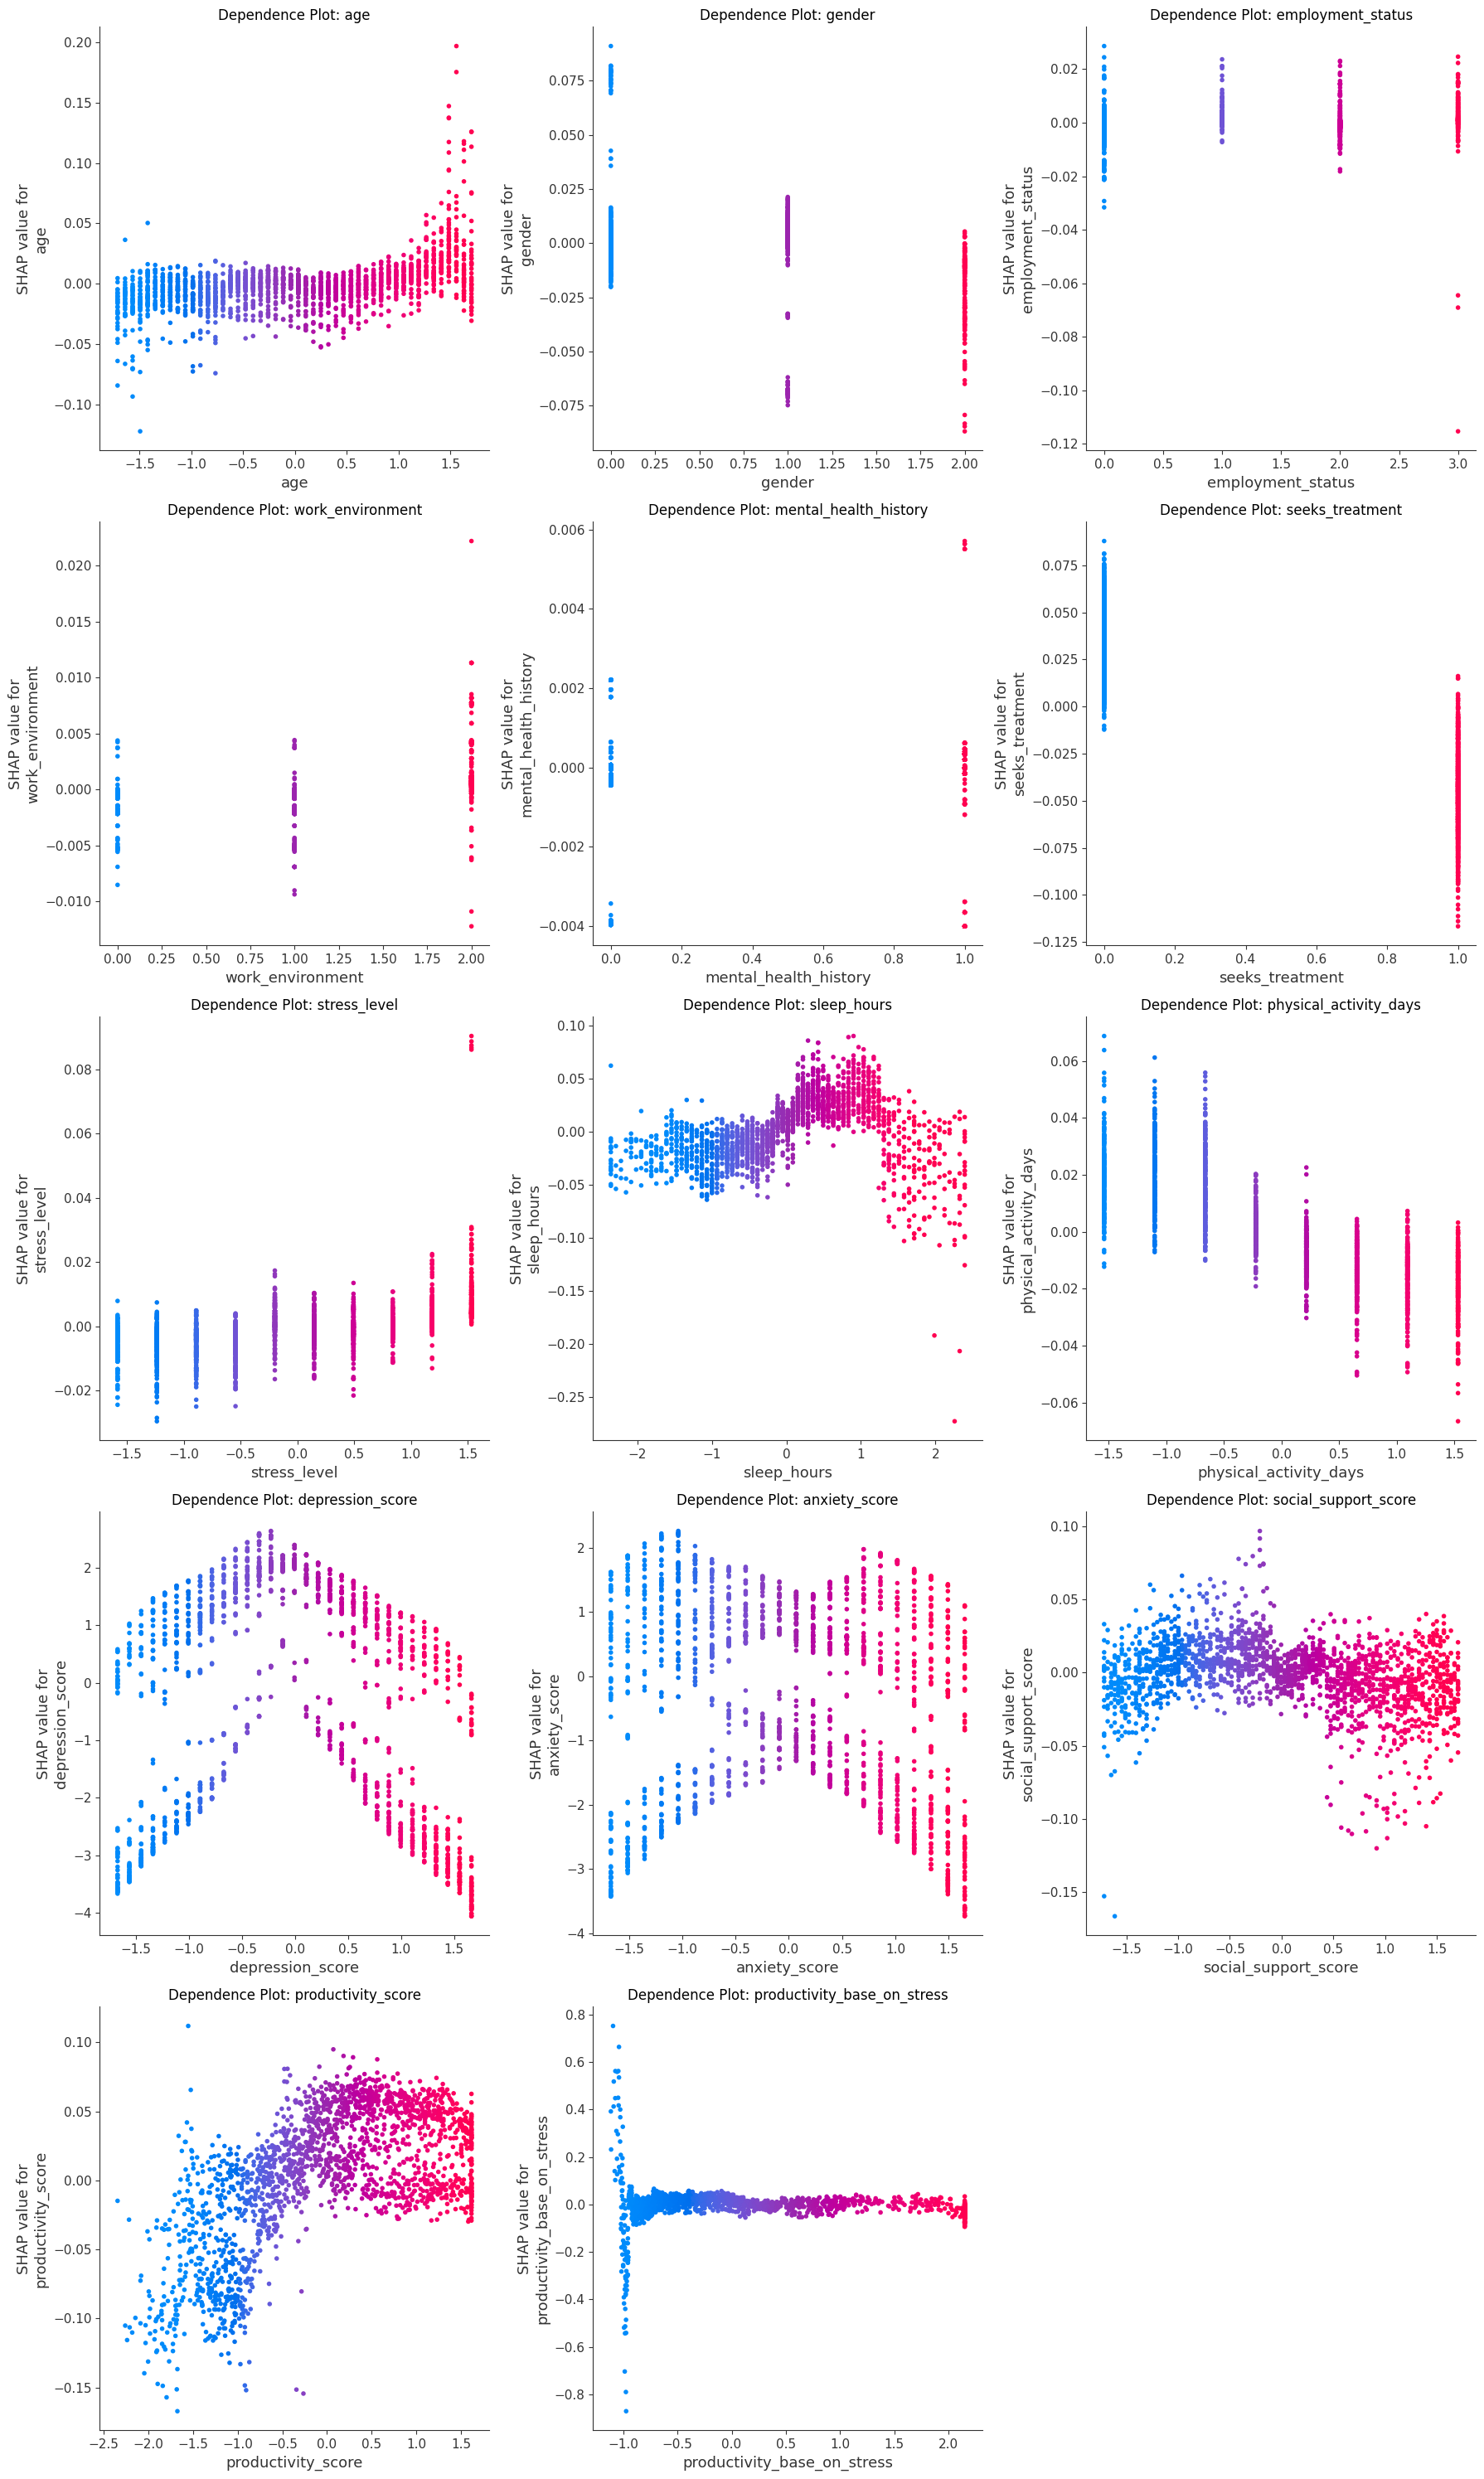

In [ ]:
trainer.shap_dependece_plot(sample_index=200)

=============== SHAP Force Plot cho sample index = 200 ===============


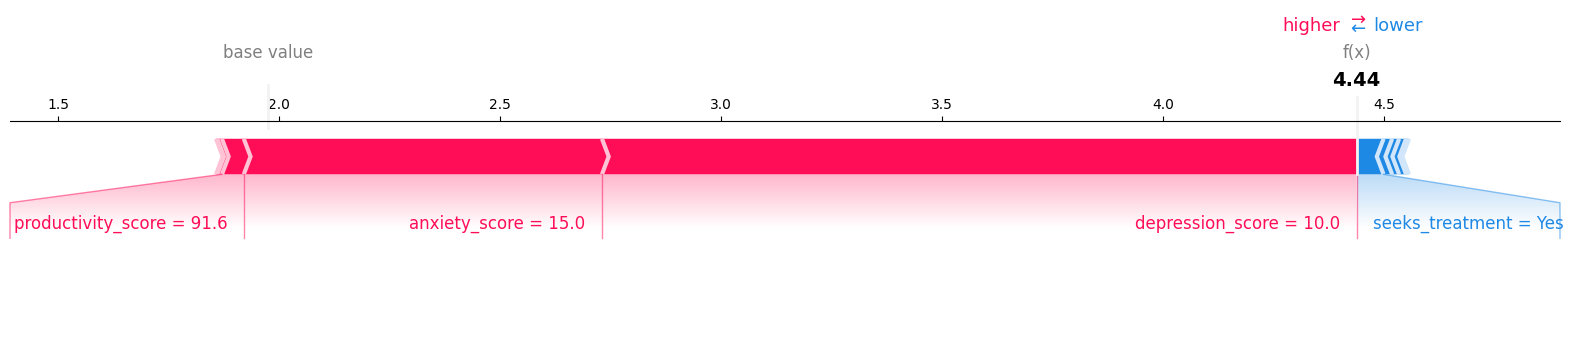

In [ ]:
trainer.shap_force_plot(sample_index=200, encoders=encoders, scaler=scaler, num_cols=num_cols)

In [ ]:
# Lưu mô hình
trainer.save_model("Best_model_with_grid_search")